import packages

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

교촌, 비비큐 치킨에 대한 검색량

https://trends.google.com/trends/?geo=KR 통해 대한민국에서의 검색량을 조사

비비큐 치킨은 "bbq", "비비큐"의 검색량을 조사한 뒤 더함

In [80]:
df = pd.read_csv('multiTimeline.csv')

In [81]:
df

,일,bbq,비비큐,교촌
0,2022-10-27,45,8,7
1,2022-10-28,50,13,68
2,2022-10-29,53,0,35
3,2022-10-30,49,17,44
4,2022-10-31,32,8,11
5,2022-11-01,38,0,15
6,2022-11-02,32,0,34
7,2022-11-03,38,0,39
8,2022-11-04,54,24,36
9,2022-11-05,80,14,49


In [82]:
df['bbq'] += df['비비큐']
df.drop('비비큐', inplace=True, axis=1)
df.drop('일', inplace=True, axis=1)
df.rename(columns={'교촌': 'Kyochon'}, inplace=True)

df

,bbq,Kyochon
0,53,7
1,63,68
2,53,35
3,66,44
4,40,11
5,38,15
6,32,34
7,38,39
8,78,36
9,94,49


각각의 검색량 그래프

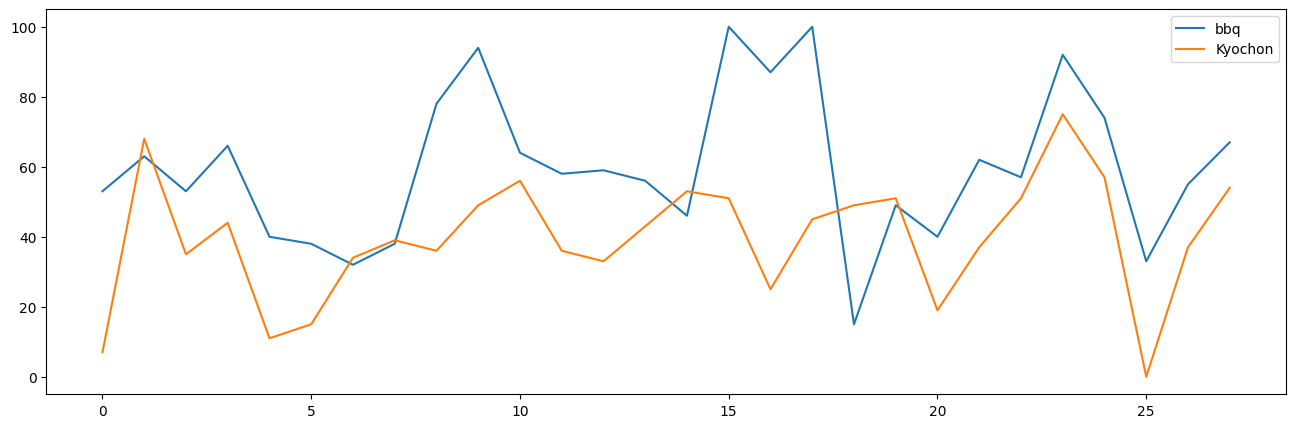

In [83]:
df.plot(figsize=(16, 5))
plt.show()

### 추세 분석
차수: DEG

의사역행렬을 이용하여 가장 가까운 해를 찾음

In [168]:
DEG = 13

In [169]:
a = np.matrix([
    [pow(i, j) for j in range(DEG+1)] for i in range(df['bbq'].size)
])

bbq = np.matrix(df['bbq']).transpose()
kyo = np.matrix(df['Kyochon']).transpose()

a.shape

(28, 14)

In [170]:
mp_inverse = np.linalg.inv(a.transpose()*a)*a.transpose()

In [171]:
bbq_coeff = mp_inverse * bbq
kyo_coeff = mp_inverse * kyo

In [172]:
bbq_coeff.shape

(14, 1)

In [176]:
bbq_poly = np.poly1d(bbq_coeff.transpose().tolist()[0])
kyo_poly = np.poly1d(kyo_coeff.transpose().tolist()[0])

kyo_poly

poly1d([-4.91047163e+01, -4.15124607e+00, -3.52188457e-01, -2.99330867e-02,
       -2.54645657e-03, -2.16742836e-04, -1.84536631e-05, -1.57144813e-06,
       -1.33835220e-07, -1.13993418e-08, -9.70956383e-10, -8.26551614e-11,
       -7.06808043e-12, -6.15024300e-13])

In [177]:
plot_x = np.linspace(0, 28, 100)

bbq_y = [bbq_poly(i) for i in plot_x]
kyo_y = [kyo_poly(i) for i in plot_x]

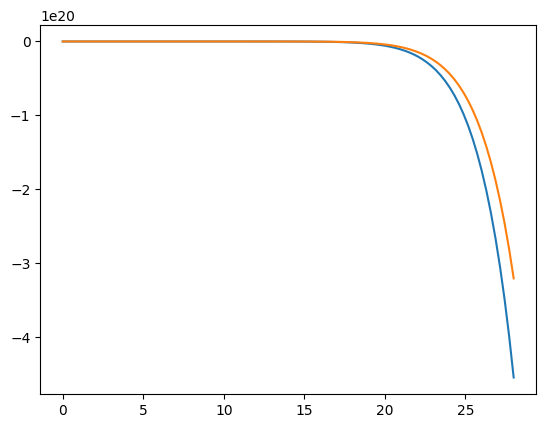

In [178]:
plt.plot(plot_x, bbq_y, label="bbq_trend")
plt.plot(plot_x, kyo_y, label="Kyochon_trend")
plt.show()